In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
config_file=r"C:\Users\Manish kumar\Downloads\object_detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
forgen_model= r"C:\Users\Manish kumar\Downloads\object_detection\frozen_inference_graph.pb"

In [3]:
model =cv2.dnn_DetectionModel(forgen_model,config_file)

In [4]:
file_path = r"C:\Users\Manish kumar\Downloads\object_detection\label.txt"
label=[]
  # Replace with your file path

try:
    with open(file_path, 'r') as file:
        text = file.read()  # Read the complete text from the file
        words = text.split()  # Split the text into words
        label.extend(words)  # Append the words to the list
except FileNotFoundError:
    print("File not found. Please check the file path.")


In [5]:
print(len(label))

93


In [6]:
model.setInputSize(320,320) #This line sets the input size of the model to 320x320 pixels
model.setInputScale(1.0/127.5) #It divides the pixel values of the input image by 127.5, which is a normalization factor.
model.setInputMean((127.5,127.5,127.5)) # It subtracts the mean values (127.5, 127.5, 127.5) from each channel of the input image.
model.setInputSwapRB(True) #This line indicates whether to swap the Red and Blue channels of the input image. If set to True, it swaps the channels; if set to False, it does not perform the swap.

< cv2.dnn.Model 0000011CBDCD95D0>

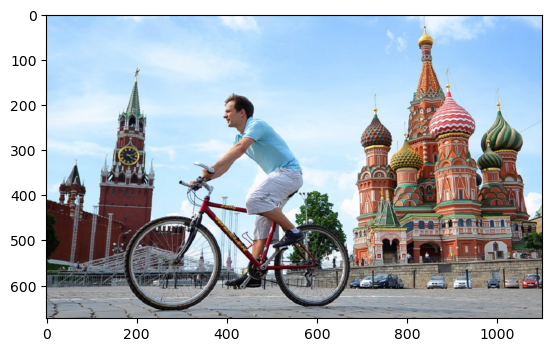

In [7]:
img=cv2.imread(r"C:\Users\Manish kumar\Downloads\object_detection\bike-in-moscow.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
classindex, confidence, box= model.detect(img, confThreshold=.6)

In [9]:
print(classindex)

[2 1]


In [10]:
font_size=3
font=cv2.FONT_HERSHEY_PLAIN
for classind, conf, boxes in zip(classindex.flatten(),confidence.flatten(),box ):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,label[classind-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_size, color=(0,255,0),thickness=3)
    cv2.putText(img,label[classind-1],(boxes[0]+10, boxes[1]+40), font, fontScale=font_size, color=(0,255,0),thickness=2)

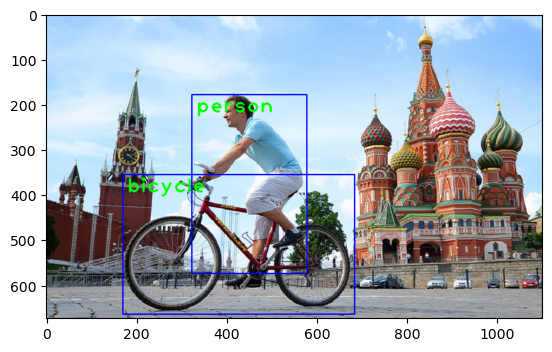

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
video = r"C:\Users\Manish kumar\Downloads\object_detection\pexels-videogrammer-nft-1721294-1920x1080-25fps.mp4"

## This code is for recorded video 

In [ ]:
vid= cv2.VideoCapture(video)

if not vid.isOpened():
    vid= cv2.VideoCapture(0)
if not vid.isOpened():
    raise IOError('Cannot open video')
    
font_scale= 3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= vid.read()
    classindx, confidence, boxes= model.detect(frame,confThreshold=.6)
    
    print(classindx)
    if (len(classindx)!=0):
        for classind,conf, boxes in zip(classindx.flatten(),confidence.flatten(), boxes):
            if (classind<=93):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,label[classind-1],(boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=2)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyWindow()

## This code is for live camera 

In [13]:
import cv2

vid = cv2.VideoCapture(0)  # Use index 0 for the default camera

if not vid.isOpened():
    raise IOError('Cannot open camera')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = vid.read()
    classindx, confidence, boxes = model.detect(frame, confThreshold=0.5)

    print(classindx)
    if len(classindx) != 0:
        for classind, conf, boxes in zip(classindx.flatten(), confidence.flatten(), boxes):
            if classind <= 93:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, label[classind-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(1) == ord('q'):  # Press 'q' to exit
        break

vid.release()
cv2.destroyAllWindows()

()
[ 1 47]
[ 1 47]
[ 1 47 77]
[ 1 77]
[ 1 47 77]
[ 1 47 77]
[ 1 47]
[ 1 47 60]
[1]
[ 1 47]
[1]
[1]
[ 1 47]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[1]
[ 1 47]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[47  1]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[1]
[1]
[1]
[ 1 47]
[1]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[ 1 46]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 46]
[ 1 47]
[1]
[1]
[ 1 47]
[1]
[1]
[1]
[ 1 47 46]
[ 1 47]
[1]
[1]
[ 1 47]
[1]
[1]
[ 1 47]
[ 1 47]
[1]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[ 1 47]
[1]
[1]
[ 1 47]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 47]
[1]
[1]
[ 1 47]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1